Welcome to Julia
================

<img src="https://camo.githubusercontent.com/e1ae5c7f6fe275a50134d5889a68f0acdd09ada8/687474703a2f2f6a756c69616c616e672e6f72672f696d616765732f6c6f676f5f68697265732e706e67" alt="Julia logo" style="width: 300px;"/>

*Scott Thomas, Institute of Astronomy*

Welcome to Julia. This short presentation covers the following topics:

* What is Julia?
* How can you get started using Julia at the IoA?
* What is Julia good at?
* What is Julia not good at?

# What is Julia?

<img src="images/what-is-julia.png" alt="Juli-what?" style="width: 300px;"/>

Julia is a new scientific language designed for **"greedy, unreasonable, demanding"** programmers who want speed, flexibility, and usability.

It's a young language - in open development for about three years - but it shows a lot of promise. In particular, Julia promises to help break the "two-language problem". In science, one often wants to try out things on a small scale, develop code interactively, and tinker, before settling down to make it run fast on large amounts of data. Many scientists and programmers find that they need to move between two languages to do this: a dynamic language like Python that is easy to code in, and a fast language like C that gives numerical power. For many of us who aren't the best programmers in the world (myself definitely included), doing this incurs a significant overhead as we struggle with two different languages. Julia aims to remove the need for this division.

## Speed with flexibility

<img src="http://sebastianraschka.com/Images/matcheat_julia_benchmark.png" alt="Julia benchmarks" style="width: auto;"/>

Here are benchmark results from a number of algorithms implemented in various languages. It's important to note that aren't based on writing optimal code in every situation. Rather, they're intended to show what sort of raw speed you can get by writing the same algorithm (which may be relatively naïve) in different languages. In general, Julia can provide speeds to within a factor of 2 of C, and orders of magnitude faster than dynamic languages like Python or Matlab.

## Familiarity

Users of Matlab, Python or IDL will be right at home.

In [1]:
# mathematical operations
[1,2,3] + [4,5,6]
# => [5, 7, 9]

# nice short functions
f(x) = 7x
f(3)
# => 21

# arrays
onetwothree = [1,2,3]
notseven = [1:6; 8:10]
square = [1 2 3;
          4 5 6;
          7 8 9]

# indexing
square[2,3]

6

 ## Easily call Python...

Julia has a very good "foreign function interface" - it's easy to work with stuff written in other languages. This is important for a young language, as it makes it possible to draw on vast libraries of Python code which don't yet have equivalents in Julia.

In [2]:
using PyCall
@pyimport astropy.io.fits as fits
hdulist = fits.open("data/fits-spectrum.fits")
hdrdata = hdulist[2][:data]

hdrdata["DATAMAX"]

PyObject chararray(['  2.7387550E-15', '  1.9348280E-15'], 
      dtype='|S15')

## ... and use Matplotlib

INFO: Loading help data...


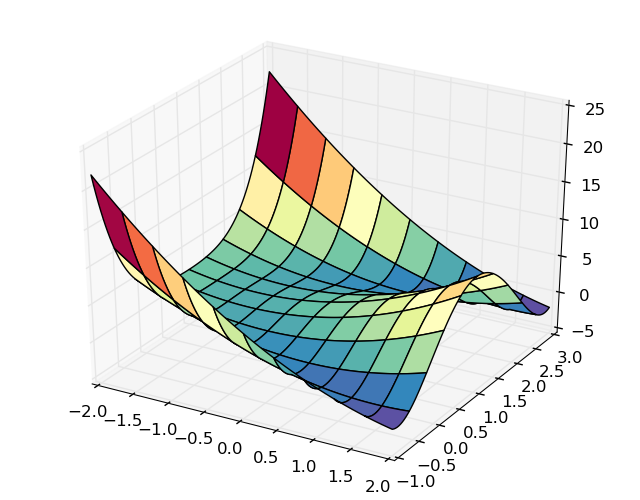

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f26e687f050>

In [3]:
using PyPlot
f(x, y) = (1 - x^2) + (y - x^2)^2
xs = linspace(-2, 2)
ys = linspace(-1, 3)
zs = [f(x,y) for x in xs, y in ys];

surf(xs, ys, zs, cmap="Spectral_r")

## Or use Julia's own (pretty) plotting libraries

Of course, Julia has its own plotting libraries like Winston and Gadfly (below).

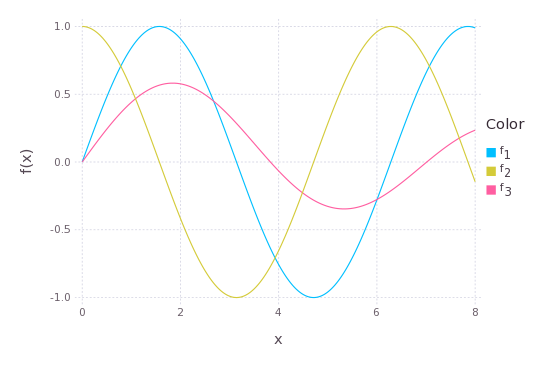

In [4]:
import Gadfly

funcs = [sin, cos, besselj1]
Gadfly.plot(funcs, 0, 8)

# How to get started
## Three ways to run Julia

<img src="images/ways-to-use-julia.png" alt="Ways to use Julia" style="width: auto;"/>

## On your own computer

<img src="images/way-1-laptop.png" alt="On your own computer" style="width: auto;"/>

... from the [Julia website](http://julialang.org/downloads/)

You can download Julia and install it on your own computer. As of the time of writing, version 0.3.6 is the stable version.

You can also try [Juno](http://junolab.org) which is a nice editor bundled with Julia.

<img src="http://junolab.org/images/error.png" alt="Juno demonstration" style="width: 800px;"/>

<img src="images/way-1-laptop.png" alt="On your own computer" style="width: auto;"/>

Advantages:

* roll your own installation for maximum customization
* you can use the beta 0.4 version for more features at the risk of things breaking occasionally

Disadvantages:

* have to install stuff
* uses space (not too much)

## On the IoA servers

<img src="images/way-2-ioa.png" alt="On the IoA servers" style="width: auto;"/>

Thanks to Roderick, we have our own installation of Julia on the IoA cluster. See the [tutorial](julia-tutorial.ipynb) for a little more information on setting this up.

Activate it by doing 

* `module load git python/2.7`
* `module load julia`

Following this, typing `julia` will start the julia command line. It looks like this:

<img src="images/julia-terminal.png" alt="Julia command line" style="width: auto;"/>

<img src="images/way-2-ioa.png" alt="On the IoA servers" style="width: auto;"/>

Advantages:

* no need to install anything
* we have pre-built important packages for you
* can still add your own packages to your home directory

Disadvantages:

* system packages don't automatically show up at the moment
* your own packages will use a bit of space in your home directory

## JuliaBox online notebook

<img src="images/way-3-cloud.png" alt="In the cloud" style="width: auto;"/>

With a Google account (Gmail, Google+, Youtube, etc) you can use [JuliaBox](http://www.juliabox.org), sync your notebooks to Google Drive or connect a Github account. JuliaBox has a large number of common packages already installed.

<img src="images/way-3-cloud.png" alt="In the cloud" style="width: auto;"/>

Advantages:

* use anywhere with a web browser
* it's real pretty
* packages are precompiled so they go fast

Disadvantages:

* tied to Google account
* 6 hour time limit per session
* might disappear
* little control over host machine

# What is Julia good at?

<img src="images/good-julia.png" alt="Julia is good at..." style="width: auto;"/>

## Fast numerical computing without the fuss

<img src="images/just-in-time.png" alt="JIT compilation" style="width: auto;"/>

* Julia is *dynamically typed* (Python, IDL) rather than *statically typed* (C, Fortran), but aims to take the best features from both.
* Clever type inference and just-in-time compilation means that once you've used a function, a speedy version of it has been compiled and stored for later use.

Much of the secret to Julia's speed comes from its clever system of types. Many more restrictive languages feature strong type systems as well, but Julia is nice in that it doesn't make you think about them unless you want to. If you don't specify a type, Julia will try and work it out for you, and will do its best to make your code fast regardless.

## Interfaces nicely with Python, C, Fortran

* A really nice "foreign function interface" makes calling other code easy. Put in the library, the function, the return and argument types and you're done!

In [5]:
ccall((:clock, "libc"), Int32, ())

76500000

* Even easier: use pre-made packages which wrap the GSL.
* As we saw before, calling Python is easy with PyCall. You can use any Python library you have installed. Calling Fortran routines is also possible.

## Effective, strong type system

<img src="images/type-hierarchy.png" alt="Type hierarchy" style="width: auto;"/>

* Julia is built on a strong foundation of "types". If you write a function and tell it to work on a *Number*, it will work on any *Real* or *Complex* number, *Integer* or *Floating Point*.
* You never have to worry about it if you don't need to, but this gives you a really powerful way to structure your own code by writing your own types.

The diagram above shows how part of the type system is laid out. All numbers belong to an appropriate type, and Julia knows how to perform the most efficient operations on any particular type. When you write *your* functions, you have the option of specifying the types of data you're going to provide. This has a couple of advantages:

* the function won't work on the wrong type, letting you catch errors early
* you can write different versions of functions to work on different types (more on that in a moment)

<img src="images/my-types.png" alt="My type hierarchy" style="width: auto;"/>

* For example, some of my equation of state calculations are done using this type of structure.

I am doing work involving the equations of state (EOS) of planetary interiors. Some equations of state are simple: they just need a function evaluation, or an interpolation. Some need numerical inversion, so they need additional information to evaluate. And some are piecewise, consisting of many equations of state stacked together. By laying my code out in a type hierarchy, I can choose whether the functions I write will apply to all of these, or just some, as is appropriate.

## Multiple dispatch

is best shown with an example.

<img src="images/multi-dispatch-example.png" alt="Julia is not yet good at..." style="width: auto;"/>

Let's say we want to classify things according to whether they're `Living` or `Dead`. Let's further say that we want to make two types of living things: `Animal`s, for which we know a species name and a noise, and `Plant`s, for which we only know a species name. Here's a hierarchy of types for that.

Let's further imagine that we want to define two functions here: one called `isalive` that tells us if a particular thing is alive, and another called `say` that tells us what noise a particular thing makes. We want `say` to work on every `Living` thing, even `Plant`s, but we don't want it to work for dead things.

How would that look?

In [ ]:
abstract Living
abstract Dead
type Skeleton <: Dead end
type Plant <: Living
    species
end
type Animal <: Living
    species
    noise
end;

We just defined the types, making `Plant`s and `Animal`s `Living`. We also made a `Dead` `Skeleton` type, because why not.

In [ ]:
randy = Animal("squirrel", "scritch scritch")
palmy = Plant("palm tree")
skelly = Skeleton();

Then we make some instances of those types. Randy the squirrel, who goes "scritch scritch". Palmy the palm tree, who doesn't have a noise. And Skelly the skeleton.

In [ ]:
isalive(l) = isa(l, Living)
say(a::Animal) = println("The $(a.species) goes '$(a.noise)'.")
say(l::Living) = println("I don't know what a $(l.species) sounds like.");

We write our functions. The `isalive` function just checks if something is `Living`. But `say` is more interesting: we wrote it twice, once for `Animal`s in particular and again as a fallback `Living` case. Now everything should behave as expected:

In [6]:
println(isalive(palmy))
println(isalive(skelly))
say(randy)
say(palmy);

true
false
The squirrel goes 'scritch scritch'.
I don't know what a palm tree sounds like.


And finally, we should get an error when we try to call the function `say` on something it's not defined to handle.

In [7]:
say(skelly)

LoadError: `say` has no method matching say(::Skeleton)
while loading In[7], in expression starting on line 1

## Parallelism

I haven't tried this much, but there is parallel computing support. You can open Julia on multiple cores and share work among them. 

Here we roll a 6-sided die one million times and sum the result. You can see that making the for-loop into a parallel for-loop is a simple matter of adding an `@parallel` tag, and we also have the option of adding a reduction function at the end. In this case we choose to sum all the values `(+)`. If we started Julia on multiple cores, it would be distributed automatically among them.

In [8]:
N = 1_000_000

roll_a_die() = rand(1:6)
total = @parallel (+) for i=1:N
    roll_a_die()
end

average = total / N

3.502831

# What is Julia not good at (yet)?

<img src="images/bad-julia.png" alt="Julia is not yet good at..." style="width: auto;"/>

## Language stability

<img src="images/constantly-changing.png" alt="Constantly changing" style="width: auto;"/>

* Things are constantly changing
* Release branches like 0.3.6 (current version) are stable but the language will evolve

If you want to never have to rewrite your code ever again, Julia is not for you. Things will change - though at this stage, the language is stable enough that they will only be minor. Far more significant will be how packages change over time.

## Package support

<img src="images/few-astro-libraries.png" alt="Few astro libraries" style="width: auto;"/>

* Little in the way of astronomy packages
* Packages may be sparsely documented and sometimes buggy

## Can't make arbitrary code fast

* Despite function specialization, it's still very possible to write slow code in Julia
* Functions in libraries like Scipy use C anyway, so they can be pretty good in many situations
* If you can already code in C/Fortran/whatever, you are not going to gain any speed here
* Julia's advantage is being able to write numerically heavy code using simple syntax - ideal for fixing the "two-language problem"

## Tinkering may be required

<img src="images/tinkering-required.png" alt="Tinkering may be required" style="width: auto;"/>

* But the community are quick to fix problems, and you can ask me if you're just getting going.

# Summary

<img src="images/julia-summary.png" alt="Graphical summary of Julia" style="width: auto;"/>

* New language
* Pretty speedy
* Nice interoperability
* Clean and powerful